In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
ruta_archivos = 'C:/Users/Santiago/Documents/MOLDHES/PRUEBA/MOLDHES 2020 --2024/Pendientes_*.csv'

In [3]:
# Encontrar todos los archivos CSV
archivos = glob.glob(ruta_archivos)

# Lista para almacenar los DataFrames
dataframes = []

In [4]:
# Leer cada archivo y agregarlo a la lista
for archivo in archivos:
    df = pd.read_csv(archivo,delimiter=';',parse_dates=['fecha_entrega','fecha_ingreso'])  # Cambia a pd.read_excel() si son archivos Excel
    dataframes.append(df)

In [5]:
dataframes[0]

,pedido_interno,producto_descripcion,material,codigo_cliente,nombre_cliente,molde,fecha_ingreso,fecha_entrega,cantidad,valor,subtotal,mes
0,11093,carcaza s/ped.,A.B.S.,C0165,FABRICATO S.A.,INY-112-1,2019-01-21,2019-02-02,1,0,0,1
1,11237,ensamble de caja s/ped.,PBT FV NYLON,C0217,E.S.E HOSPITAL GENRAL DE MEDELLIN,INY-137-1-2-3-4,2019-03-14,2020-01-29,30,371000,11130000,3
2,11426,portadosimetro s/m.,policarbonato,C0310,SIEVERT S.A.S,INY-131,2019-05-23,2019-09-16,10000,2000,20000000,5
3,11483,segmento para cepillos s/pl.,nylon,C106,XXXXXXXXXX,4176,2020-01-07,2020-01-25,210,12000,2520000,1
4,11503,Antenas s/molde,nitrilo dieletrico 75-80,C0238,JAIRO HERNANDEZ Y/O CAPTACOM,C0238-1,2019-06-13,2019-06-21,49,5000,245000,6
...,...,...,...,...,...,...,...,...,...,...,...,...
776,12723,carter XMA fijo. FL83187 s/ped.,poliestireno,C0271,SOFASA S.A.,C0271-4,2021-01-04,2021-01-08,1,67000,67000,1
777,12724,carter pinza grande GFW FL 78016652,poliestireno,C0271,SOFASA S.A.,C0271-9,2021-01-04,2021-01-08,2,52500,105000,1
778,12725,separador s/m.,Poliestireno,C0165,FABRICATO S.A.,3577,2021-01-04,2021-01-20,400,5350,2140000,1
779,12726,pasador de bobina sulzer s/pl.,acetal,C0165,FABRICATO S.A.,3165,2021-01-04,2021-01-20,200,750,150000,1


In [6]:
# Concatenar todos los DataFrames
df_unido = pd.concat(dataframes, ignore_index=True)

In [8]:
df_unido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2980 entries, 0 to 2979
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   pedido_interno        2980 non-null   int64         
 1   producto_descripcion  2980 non-null   object        
 2   material              2979 non-null   object        
 3   codigo_cliente        2980 non-null   object        
 4   nombre_cliente        2980 non-null   object        
 5   molde                 2980 non-null   object        
 6   fecha_ingreso         2980 non-null   datetime64[ns]
 7   fecha_entrega         2980 non-null   datetime64[ns]
 8   cantidad              2980 non-null   int64         
 9   valor                 2980 non-null   int64         
 10  subtotal              2980 non-null   int64         
 11  mes                   2980 non-null   int64         
dtypes: datetime64[ns](2), int64(5), object(5)
memory usage: 279.5+ KB


In [9]:
df_unido.isna().sum()

pedido_interno          0
producto_descripcion    0
material                1
codigo_cliente          0
nombre_cliente          0
molde                   0
fecha_ingreso           0
fecha_entrega           0
cantidad                0
valor                   0
subtotal                0
mes                     0
dtype: int64

In [10]:
df_unido.duplicated().sum()

84

In [11]:
duplicates = df_unido[df_unido['pedido_interno'].duplicated(keep='first')]

print(duplicates)

      pedido_interno                               producto_descripcion  \
781            11093                                     carcaza s/ped.   
782            11237                           ensamble de caja  s/ped.   
783            11503                                    Antenas s/molde   
784            11992                                  guia riel s/molde   
785            12027                descargador para condensador s/ped.   
...              ...                                                ...   
2948           14861                      Tapa De 28Mm S/Ped (2.74 Grs)   
2949           14862                      Portadosimetro Tld S/Ped.  Pq   
2950           14863   Valvula 28 Mm  S/Ped (4.06 Gramos, 12 Cavidades)   
2952           14865  Polea De Transmision Para Envolvedora Savio S/Pl.   
2956           14869  Guia De Lizos Para Marcos Telar Toyota  J2420-...   

                                              material codigo_cliente  \
781                       

In [12]:
df_unido = df_unido.drop_duplicates()

In [13]:
df_unido.info()

df_unido.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 2896 entries, 0 to 2979
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   pedido_interno        2896 non-null   int64         
 1   producto_descripcion  2896 non-null   object        
 2   material              2895 non-null   object        
 3   codigo_cliente        2896 non-null   object        
 4   nombre_cliente        2896 non-null   object        
 5   molde                 2896 non-null   object        
 6   fecha_ingreso         2896 non-null   datetime64[ns]
 7   fecha_entrega         2896 non-null   datetime64[ns]
 8   cantidad              2896 non-null   int64         
 9   valor                 2896 non-null   int64         
 10  subtotal              2896 non-null   int64         
 11  mes                   2896 non-null   int64         
dtypes: datetime64[ns](2), int64(5), object(5)
memory usage: 294.1+ KB


0

In [14]:
df_unido['nombre_cliente']=df_unido['nombre_cliente'].replace('Incodesa tel: 301-315-35-47 (Cristina Jimenez)','Incodesa')

df_unido['nombre_cliente']=df_unido['nombre_cliente'].replace('Incodesa tel: 312-422-14-71 (TATIANA )','Incodesa')

df_unido['nombre_cliente']=df_unido['nombre_cliente'].replace('1','Desconocido')

df_unido['nombre_cliente']=df_unido['nombre_cliente'].replace('3','Desconocido')

df_unido['nombre_cliente']=df_unido['nombre_cliente'].replace('AVINAL S.A','AVINAL S.A.')

df_unido['nombre_cliente']=df_unido['nombre_cliente'].replace('COLCERAMICA S.A.S  PL LA ESTRELLA','COLCERAMICA S.A.S  PL. LA ESTRELLA')

df_unido['material'] = df_unido['material'].replace('P . P','P.P')

df_unido['material'] = df_unido['material'].replace('P. P','P.P')

df_unido['material'] = df_unido['material'].replace('P:P','P.P')

df_unido['material'] = df_unido['material'].replace('p.p','P.P.')

df_unido['material'] = df_unido['material'].replace('p.p.','P.P.')

df_unido['material'] = df_unido['material'].replace('P.P','P.P.')

df_unido['material'] = df_unido['material'].replace('P.P ','P.P.')

df_unido['material'] = df_unido['material'].replace('P.P','P.P.')

df_unido['material'] = df_unido['material'].replace('PP','P.P.')

df_unido['material'] = df_unido['material'].replace('A.B.S Anti-flama','A.B.S Antiflama')

df_unido['material'] = df_unido['material'].replace('ABS Anti-flama','A.B.S Antiflama')

df_unido['material'] = df_unido['material'].replace('ABS Antiflama','A.B.S Antiflama')

df_unido['material'] = df_unido['material'].replace('ABS','A.B.S')

df_unido['material'] = df_unido['material'].replace('A.B.S','A.B.S.')

df_unido['material'] = df_unido['material'].replace('A.B.S.  ','A.B.S.')

df_unido['material'] = df_unido['material'].replace('A.B.S ','A.B.S.')

df_unido['material'] = df_unido['material'].replace('a.b.s. ','A.B.S.')

df_unido['material'] = df_unido['material'].replace('acetal','Acetal')

df_unido['material'] = df_unido['material'].replace('acetal ','Acetal')

df_unido['material'] = df_unido['material'].replace('acetal  ','Acetal')

df_unido['material'] = df_unido['material'].replace('P,B,T.','P.B.T.')

df_unido['material'] = df_unido['material'].replace('nitrilo 60-65 y lona','nitrilo 60-65 + tela lona')

df_unido['material'] = df_unido['material'].replace('nitrilo 60-65 + tela de lona','nitrilo 60-65 + tela lona')

df_unido['material'] = df_unido['material'].replace('nitrilo- 70-75','nitrilo 70-75')

df_unido['material'] = df_unido['material'].replace('nitrilo carbixilado 65- 70','nitrilo carboxilado 65- 70')

df_unido['material'] = df_unido['material'].replace('nitrilo carbixilado 65- 70','nitrilo carboxilado 65 - 70')

df_unido['material'] = df_unido['material'].replace('nylon','Nylon')

df_unido['material'] = df_unido['material'].replace('nylon ','Nylon')

df_unido['material'] = df_unido['material'].replace('nylon 6 6','nylon 6.6')

df_unido['material'] = df_unido['material'].replace('nylon 66','nylon 6.6')

df_unido['material'] = df_unido['material'].replace('nylon 6BA','Nylon 6 BA')

df_unido['material'] = df_unido['material'].replace('Nylon 6BA','Nylon 6 BA')

df_unido['material'] = df_unido['material'].replace('NYLON 6BA','Nylon 6 BA')

df_unido['material'] = df_unido['material'].replace('nylon f.v','Nylon F.V.')

df_unido['material'] = df_unido['material'].replace('nylon FV','Nylon F.V.')

df_unido['material'] = df_unido['material'].replace('nylon F.V','Nylon F.V.')

df_unido['material'] = df_unido['material'].replace('nylon f.v.','Nylon F.V.')

df_unido['material'] = df_unido['material'].replace('P.P Peletizado','P.P Peletizado')

df_unido['material'] = df_unido['material'].replace('PP PELETIZADO','P.P Peletizado')

df_unido['material'] = df_unido['material'].replace('P.P peletizado','P.P Peletizado')

df_unido['material'] = df_unido['material'].replace('PBT FV','P.B.T. F.V')

df_unido['material'] = df_unido['material'].replace('PBT F.V','P.B.T. F.V')

df_unido['material'] = df_unido['material'].replace('P.B.T. ','P.B.T.')

df_unido['material'] = df_unido['material'].replace('P.B.T fibra','P.B.T Fibra')

df_unido['material'] = df_unido['material'].replace('P.B.T fibra ','P.B.T Fibra')

df_unido['material'] = df_unido['material'].replace('polietileno alta densidad M1820 (CONQUIMICA)','Polietileno alta densidad M1820 (CONQUIMICA)')

df_unido['material'] = df_unido['material'].replace('polietileno de alta + de baja  +  aditivo','Polietileno de alta + de baja + aditivo')

df_unido['material'] = df_unido['material'].replace('polietileno de Alta M 1820 (CONQUIMICA)','Polietileno alta densidad M1820 (CONQUIMICA)')

df_unido['material'] = df_unido['material'].replace('polietileno alta densidad MI820 (CONQUIMICA)','Polietileno alta densidad M1820 (CONQUIMICA)')

df_unido['material'] = df_unido['material'].replace('polietileno de baja','Polietileno de baja')

df_unido['material'] = df_unido['material'].replace('polietileno de Baja','Polietileno de baja')

df_unido['material'] = df_unido['material'].replace('polietileno de baja','Polietileno de baja')

df_unido['material'] = df_unido['material'].replace('polietilene de baja','Polietileno de baja')

df_unido['material'] = df_unido['material'].replace('P.U 75-80','P.U. 75-80')

df_unido['material'] = df_unido['material'].replace('P.U 90-95','P.U. 90-95')

df_unido['material'] = df_unido['material'].replace('pet','Pet')

df_unido['material'] = df_unido['material'].replace('PET','Pet')

df_unido['material'] = df_unido['material'].replace('PET ','Pet')

df_unido['material'] = df_unido['material'].replace('polietileno de Alta','Polietileno de alta')

df_unido['material'] = df_unido['material'].replace('polietileno de alta','Polietileno de alta')

df_unido['material'] = df_unido['material'].replace('polietileno de alta + de baja + aditivo','Polietileno de alta + de baja + aditivo')

df_unido['material'] = df_unido['material'].replace('SILICONA','Silicona')





In [15]:
df_unido['material'] = df_unido['material'].str.strip()

df_unido['material'] = df_unido['material'].str.capitalize()

df_unido['producto_descripcion'] = df_unido['producto_descripcion'].str.capitalize()

df_unido['producto_descripcion'] = df_unido['producto_descripcion'].str.strip()

In [16]:
df_unido['material'] = df_unido['material'].replace('Nylon 6 ba','Nylon 6ba')

df_unido['material'] = df_unido['material'].replace('Polietileno de  baja','Polietileno de baja')

In [17]:
df_unido.loc[:,'fecha_entrega'] =pd.to_datetime( df_unido['fecha_entrega'],errors='coerce', format='%d/%m/%Y')
df_unido.loc[:,'fecha_ingreso'] = pd.to_datetime(df_unido['fecha_ingreso'],errors='coerce', format='%d/%m/%Y')

df_unido['año']=df_unido['fecha_ingreso'].dt.year

In [18]:


df_unido =df_unido.dropna(subset=['material'])

missing_val=df_unido.isna().sum()


print(missing_val)

pedido_interno          0
producto_descripcion    0
material                0
codigo_cliente          0
nombre_cliente          0
molde                   0
fecha_ingreso           0
fecha_entrega           0
cantidad                0
valor                   0
subtotal                0
mes                     0
año                     0
dtype: int64


In [19]:
#ejemplos_ausentes = df_unido[df_unido['fecha_ingreso'].isna() | df_unido['fecha_entrega'].isna()]

#print(ejemplos_ausentes['pedido_interno'].tolist())

nombre_cliente  ALICO S.A.  Desconocido  ELECTOQUIMICA WEST SA  \
año                                                              
2019                   NaN      47585.0               107001.0   
2020              344890.0    1721827.0               584028.0   
2021              365401.0    1918339.0               612998.0   
2022              591313.0    1821193.0               494971.0   
2023              644895.0    1747016.0               286108.0   
2024              692795.0     424442.0                44087.0   

nombre_cliente  FABRICATO S.A.  HILANDERIAS UNIVERSAL S.A.S. U  \
año                                                              
2019                  106250.0                         83038.0   
2020                  772538.0                        270282.0   
2021                  950166.0                        417905.0   
2022                 1177796.0                        301248.0   
2023                  501128.0                        199072.0   
2024     

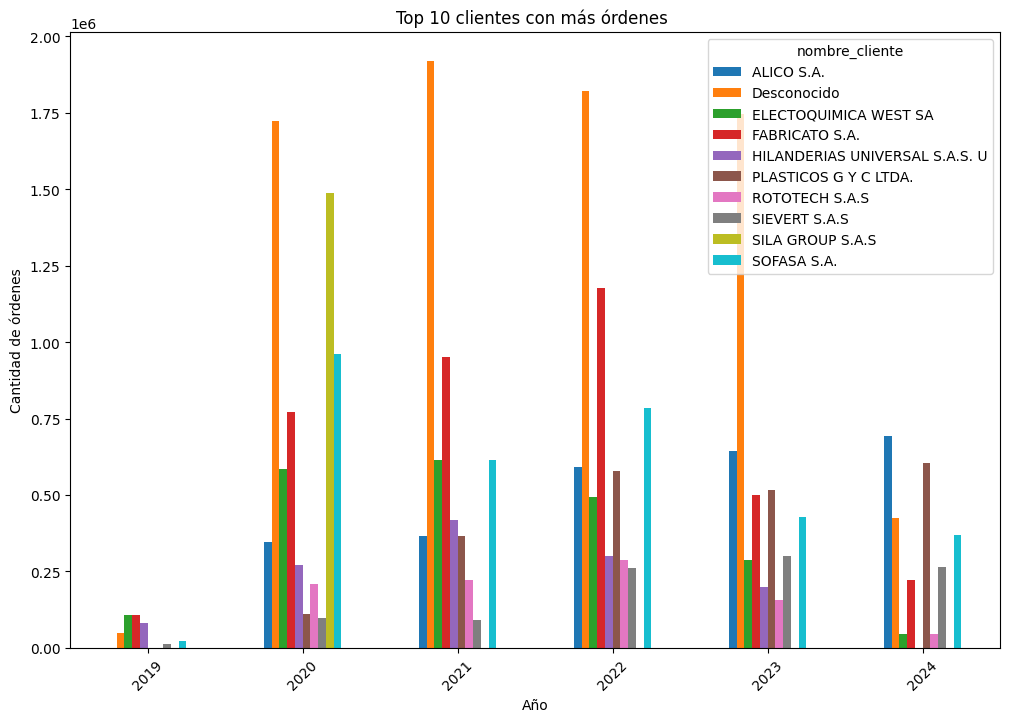

In [20]:
top_10_clientes = df_unido.groupby('nombre_cliente')['pedido_interno'].count().nlargest(10)

                                  
# Crear una tabla pivote con los 10 mejores clientes y sus pedidos por año
pivot_table = df_unido[df_unido['nombre_cliente'].isin(top_10_clientes.index)].pivot_table(
    index='año', 
    columns='nombre_cliente', 
    values='pedido_interno', 
    aggfunc='sum'
)


# Mostrar la tabla pivote
print(pivot_table)

# Opcional: Graficar los resultados
pivot_table.plot(kind='bar', figsize=(12, 8))
plt.title("Top 10 clientes con más órdenes ")
plt.xlabel("Año")
plt.ylabel("Cantidad de órdenes")
plt.xticks(rotation=45)
plt.show()

nombre_cliente
ALICO S.A.                       3594947260
ELECTOQUIMICA WEST SA            1604610239
PLASTICOS G Y C LTDA.             926892700
FABRICATO S.A.                    355351670
SILA GROUP S.A.S                  341314104
Desconocido                       326693463
SIEVERT S.A.S                     167349400
ROTOTECH S.A.S                    118407160
LABORATORIOS NATURFAR              98224873
SUPPLIES AND SERVICES ACR SAS      96832500
Name: subtotal, dtype: int64


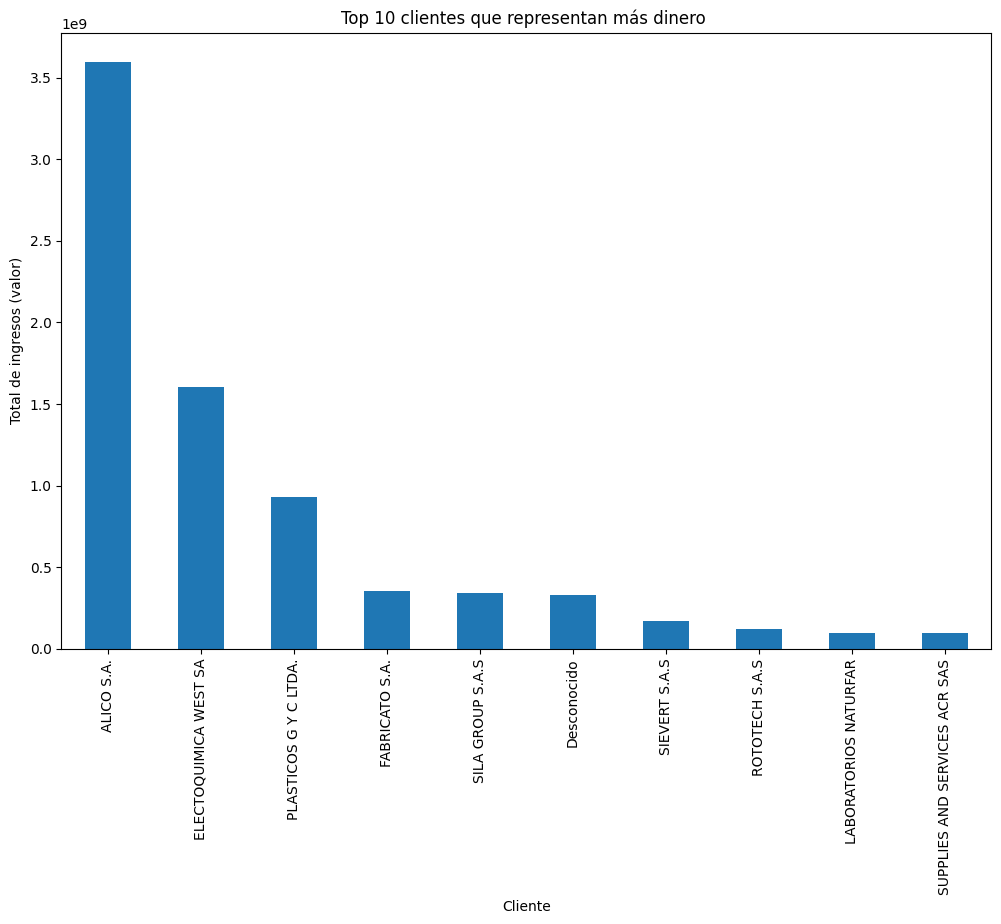

In [21]:
# Agrupar por 'nombre_cliente' y sumar los valores para calcular el dinero generado por cada cliente
clientes_valor = df_unido.groupby('nombre_cliente')['subtotal'].sum().sort_values(ascending=False)

# Mostrar los 10 clientes que más dinero representan
top_10_valor = clientes_valor.head(10)
print(top_10_valor)

# Opcional: Graficar los resultados
top_10_valor.plot(kind='bar', figsize=(12, 8))
plt.title("Top 10 clientes que representan más dinero ")
plt.xlabel("Cliente")
plt.ylabel("Total de ingresos (valor)")
plt.xticks(rotation=90)
plt.show()

In [22]:
# Agrupar por 'nombre_cliente' y sumar los valores de 'cantidad', 'valor' y 'subtotal'
clientes_material_valor = df_unido.groupby(['nombre_cliente','material']).agg({
    'subtotal': 'sum'
}).sort_values(by='subtotal', ascending=False)

top_10_material_valor=clientes_material_valor.head(10)

# Mostrar el resultado
top_10_material_valor



subtotal
nombre_cliente        material                                                      
ALICO S.A.            Polietileno de alta + de baja + aditivo             2140544610
                      Polietileno ga564                                   1234214250
ELECTOQUIMICA WEST SA Polietileno alta densidad m1820 (conquimica)         581838000
PLASTICOS G Y C LTDA. P.p. homopolimero                                    413860450
SILA GROUP S.A.S      P.p.                                                 341314104
PLASTICOS G Y C LTDA. Polietileno de alta + de baja + aditivo              314364000
ELECTOQUIMICA WEST SA A.b.s.                                               278300264
                      Pead + tpv + pp                                      255430150
                      Polietileno lineal de baja densidad mfi 20 - 100%    194431803
                      Polietileno alta densidad m1820 (conquimica)mar...   152902800

material
Nylon 6ba                                            467
Poliestireno                                         325
P.p. peletizado                                      270
P.p.                                                 234
Polietileno de alta + de baja + aditivo              160
Acetal                                               124
P.p. homopolimero                                    123
Polietileno ga564                                     92
A.b.s.                                                88
Polietileno lineal de baja densidad mfi 20 - 100%     74
Name: pedido_interno, dtype: int64


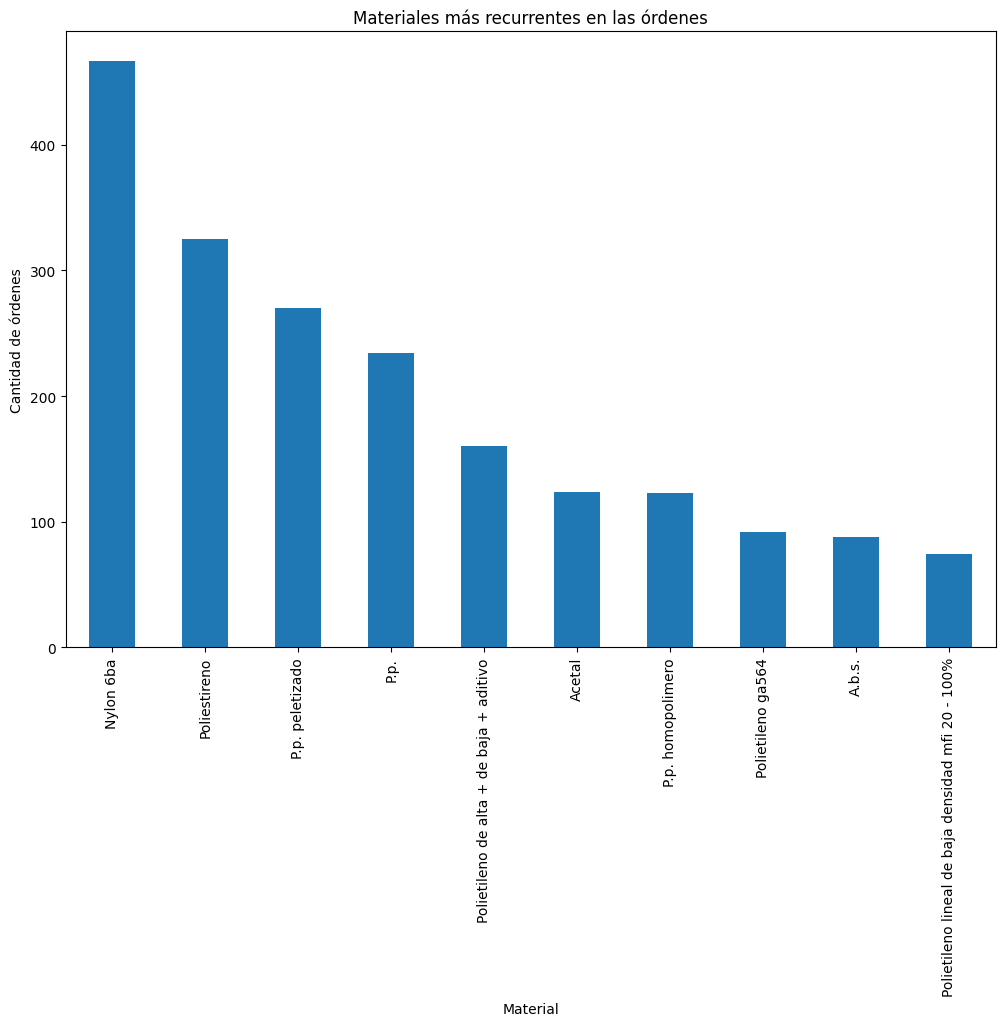

In [23]:
# Agrupar por 'material' y contar la cantidad de veces que aparece en los pedidos
material_frecuente = df_unido.groupby('material')['pedido_interno'].count().sort_values(ascending=False)

# Mostrar los materiales más frecuentes
top_materiales = material_frecuente.head(10)
print(top_materiales)

# Opcional: Graficar los resultados
top_materiales.plot(kind='bar', figsize=(12, 8))
plt.title("Materiales más recurrentes en las órdenes")
plt.xlabel("Material")
plt.ylabel("Cantidad de órdenes")
plt.xticks(rotation=(90))
plt.show()

In [24]:
df_unido.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2895 entries, 0 to 2979
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   pedido_interno        2895 non-null   int64         
 1   producto_descripcion  2895 non-null   object        
 2   material              2895 non-null   object        
 3   codigo_cliente        2895 non-null   object        
 4   nombre_cliente        2895 non-null   object        
 5   molde                 2895 non-null   object        
 6   fecha_ingreso         2895 non-null   datetime64[ns]
 7   fecha_entrega         2895 non-null   datetime64[ns]
 8   cantidad              2895 non-null   int64         
 9   valor                 2895 non-null   int64         
 10  subtotal              2895 non-null   int64         
 11  mes                   2895 non-null   int64         
 12  año                   2895 non-null   int32         
dtypes: datetime64[ns](2), i

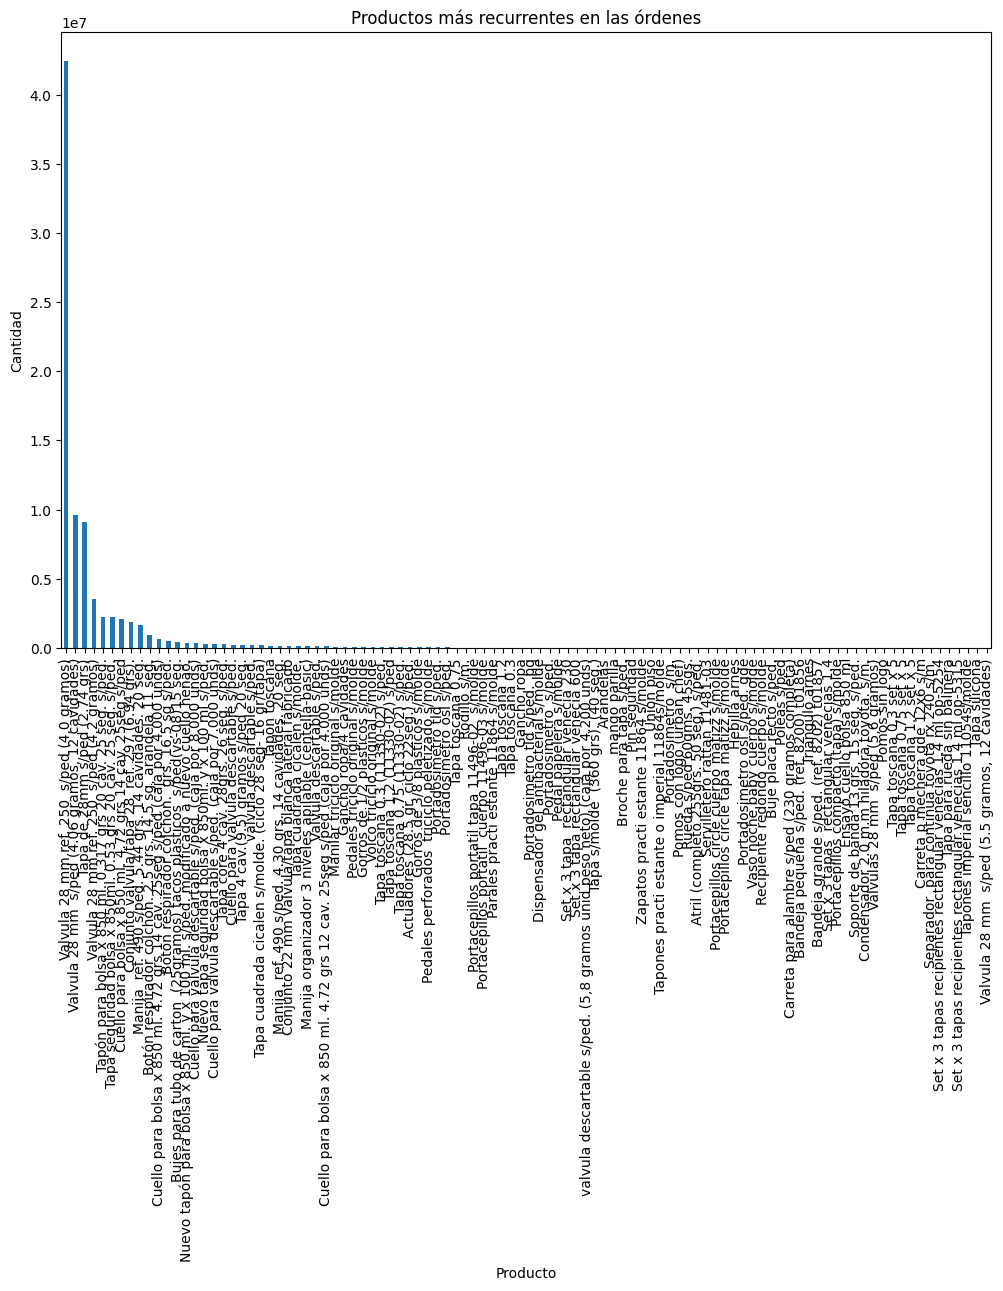

20.0


producto_descripcion
Valvula 28 mm ref. 250  s/ped (4,0 gramos)                       42438750
Valvula 28 mm  s/ped (4.06 gramos, 12 cavidades)                  9598056
Tapa de 28mm s/ped (2.74 grs)                                     9115350
Valvula 28 mm ref. 250  s/ped (4,2 gramos)                        3525900
Tapón para bolsa x 850 ml. 0.317 grs 20 cav. 25 seg. s/ped.       2241000
                                                                   ...   
Tapa para rueda sin balinera                                         4340
Set x 3 tapas recipientes rectangular venecias 1.4 ml op-5315        4176
Tapones imperial sencillo 11054s/molde                               4008
Tapa silicona                                                        4000
Valvula 28 mm  s/ped (5.5 gramos, 12 cavidades)                      4000
Name: cantidad, Length: 100, dtype: int64

In [33]:


# Agrupa por 'producto_descripcion' y suma los valores de 'cantidad'
productos_vendidos = df_unido.groupby('producto_descripcion')['cantidad'].sum().sort_values(ascending=False).head(100)

# Grafica los productos más vendidos
productos_vendidos.plot(kind='bar', figsize=(12, 8))
plt.title("Productos más recurrentes en las órdenes")
plt.xlabel("Producto")
plt.ylabel("Cantidad")
plt.xticks(rotation=90)
plt.show()


print(len(productos_vendidos)*0.2)

productos_vendidos


In [26]:
lista_materiales = df_unido['material'].unique()

lista_materiales

df_materiales =pd.DataFrame(lista_materiales,columns = ['Material'])

df_materiales.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Material  126 non-null    object
dtypes: object(1)
memory usage: 1.1+ KB


In [27]:
filas_con_valor_ausente = df_materiales[df_materiales['Material'].isna()]

filas_con_valor_ausente

df_materiales = df_materiales.dropna(subset=['Material'])

df_materiales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Material  126 non-null    object
dtypes: object(1)
memory usage: 1.1+ KB


C:\Users\Santiago\AppData\Local\Temp\ipykernel_24436\2874964304.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ingresos_mensuales = ingresos_anuales.resample('M', on='fecha_ingreso')['subtotal'].sum()


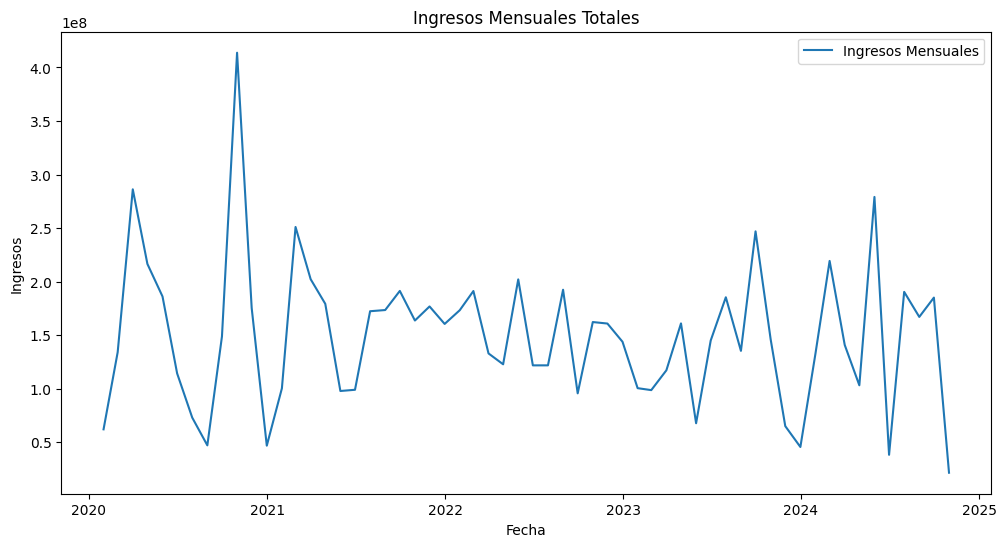

c:\Users\Santiago\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\Santiago\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


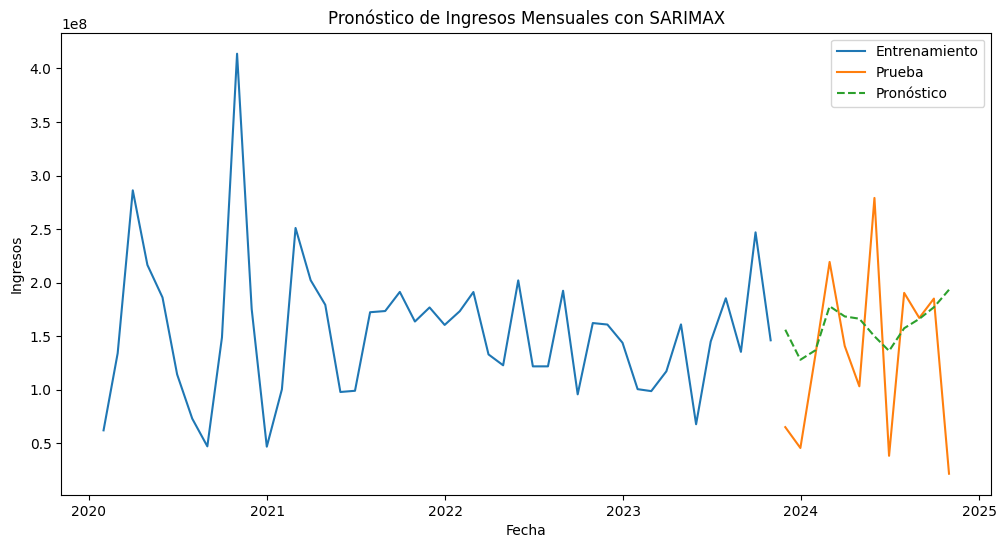

In [32]:
# Agrupar por mes y sumar los ingresos totales
ingresos_anuales= df_unido[df_unido['fecha_ingreso'].dt.year!=2019 ]

ingresos_mensuales = ingresos_anuales.resample('M', on='fecha_ingreso')['subtotal'].sum()

# Visualizar la serie de tiempo
plt.figure(figsize=(12, 6))
plt.plot(ingresos_mensuales, label='Ingresos Mensuales')
plt.title('Ingresos Mensuales Totales')
plt.xlabel('Fecha')
plt.ylabel('Ingresos')
plt.legend()
plt.show()

# Dividir en datos de entrenamiento y prueba
train = ingresos_mensuales.iloc[:-12]  # Usamos todos menos los últimos 12 meses para entrenar
test = ingresos_mensuales.iloc[-12:]   # Los últimos 12 meses para probar

# Ajustar el modelo SARIMAX
modelo = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
resultado = modelo.fit(disp=False)

# Pronosticar para el periodo de prueba
predicciones = resultado.forecast(steps=12)

# Visualizar el pronóstico
plt.figure(figsize=(12, 6))
plt.plot(train, label='Entrenamiento')
plt.plot(test, label='Prueba')
plt.plot(predicciones, label='Pronóstico', linestyle='--')
plt.title('Pronóstico de Ingresos Mensuales con SARIMAX')
plt.xlabel('Fecha')
plt.ylabel('Ingresos')
plt.legend()
plt.show()

In [31]:
#df_materiales.to_excel('Listado_materiales.xlsx',index=False)

df_unido.to_excel('Pendientes_global_final.xlsx',index=False)